# Predicting a sine wave

Scripot to predict a sine wave and get practice using LSTM layers in a recurrent neural network. 

### Sources: 

[Soumith's Githib - Time Sequence Prediction](https://github.com/pytorch/examples/tree/master/time_sequence_prediction)

# Generating Sine Wave Data
------

In [41]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cycler

Define Parameters for various sine waves

In [42]:
np.random.seed(2)

T = 20
L = 1000
N = 100

In [43]:
#Create an empty np matrix (of zeros) with shape 100x1000
x = np.zeros((N, L), 'int64')
print("Shape of matrix x:", x.shape)
print(" ")
print("Top left 5x5 matrix of matrix (x):")
print(x[:5, :5])

Shape of matrix x: (100, 1000)
 
Top left 5x5 matrix of matrix (x):
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [44]:
linear_vector = np.array(range(L))
x[:] = linear_vector + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)

These will be the starting points of our 100 phase shifted sine waves

In [45]:
data = np.sin(x / 1.0 / T).astype('float64')

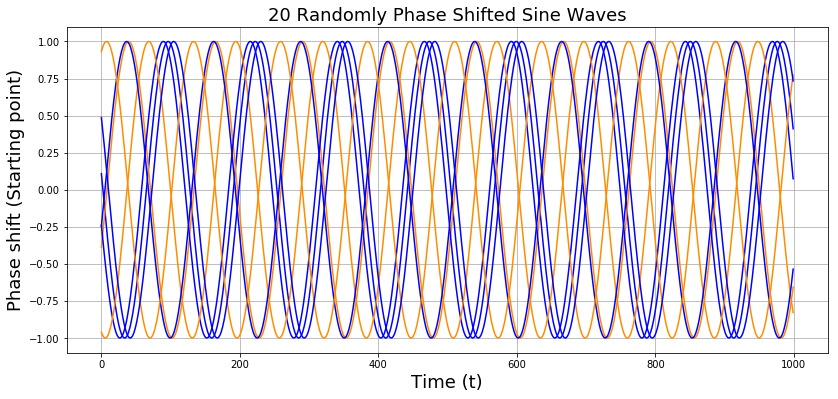

In [46]:
fig = plt.figure(figsize=(30, 6))
ax1 = fig.add_subplot(121)
plt.gca().set_prop_cycle('color', ['blue', 'darkorange'])

plt.plot(data[0, :])
plt.plot(data[1, :])
plt.plot(data[2, :])
plt.plot(data[3, :])
plt.plot(data[4, :])
plt.plot(data[5, :])
plt.plot(data[6, :])
plt.xlabel('Time (t)', fontsize = 18)
plt.ylabel('Phase shift (Starting point)', fontsize = 18)
plt.title('20 Randomly Phase Shifted Sine Waves', fontsize = 18)
plt.grid()

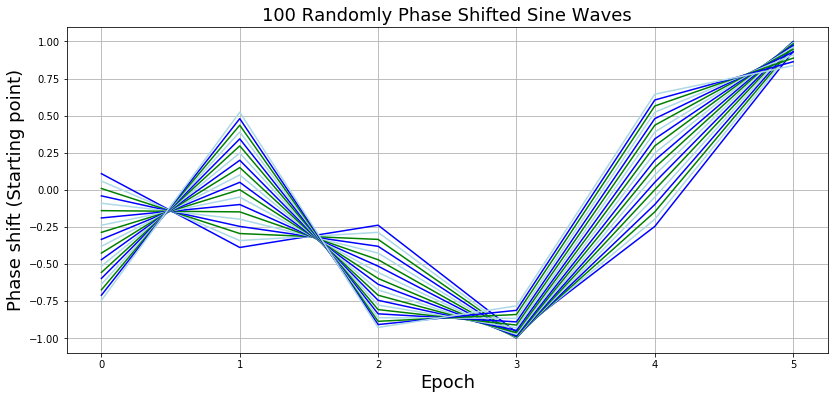

In [47]:
fig = plt.figure(figsize=(30, 6))
ax1 = fig.add_subplot(121)
plt.gca().set_prop_cycle('color', ['blue', 'lightblue', 'green'])

plt.plot(data[:6, :20])
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Phase shift (Starting point)', fontsize = 18)
plt.title('100 Randomly Phase Shifted Sine Waves', fontsize = 18)
plt.grid()

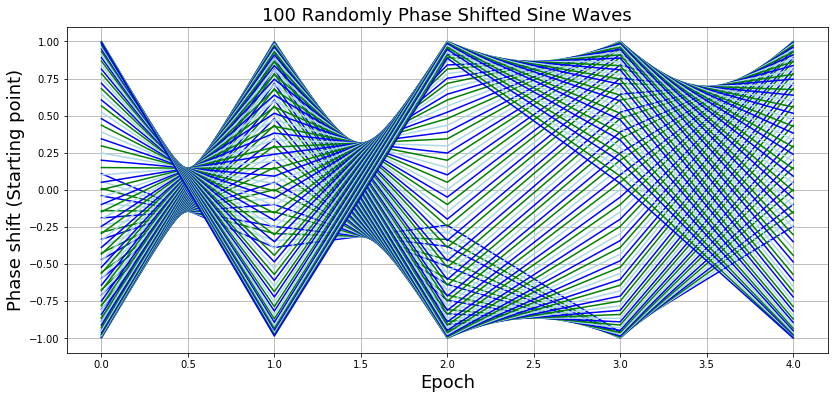

In [48]:
fig = plt.figure(figsize=(30, 6))
ax1 = fig.add_subplot(121)
plt.gca().set_prop_cycle('color', ['blue', 'lightblue', 'green'])

plt.plot(data[:5, :100])
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Phase shift (Starting point)', fontsize = 18)
plt.title('100 Randomly Phase Shifted Sine Waves', fontsize = 18)
plt.grid()

# Define Network Parameters
------

Now that we have several randomly phase shifted sine waves stored in 'data' we can begin to build out the network we will use for prediction

In [49]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/anaconda3/lib/python3.6/site-packages/t

In [50]:

class Sequence(nn.Module):
    def __init__(self):
        super(Sequence, self).__init__()
        self.lstm1 = nn.LSTMCell(1, 51)
        self.lstm2 = nn.LSTMCell(51, 51)
        self.linear = nn.Linear(51, 1)

    def forward(self, input, future = 0):
        outputs = []
        h_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        h_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)

        for i, input_t in enumerate(input.chunk(input.size(1), dim=1)):
            h_t, c_t = self.lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
        for i in range(future):# if we should predict the future
            h_t, c_t = self.lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs



In [51]:
# set random seed to 0
np.random.seed(0)
torch.manual_seed(0)

#Define data for training and testing
input = torch.from_numpy(data[3:, :-1])
target = torch.from_numpy(data[3:, 1:])
test_input = torch.from_numpy(data[:3, :-1])
test_target = torch.from_numpy(data[:3, 1:])


In [52]:
# build the model
seq = Sequence()
seq.double()
criterion = nn.MSELoss()
# use LBFGS as optimizer since we can load the whole data to train
optimizer = optim.LBFGS(seq.parameters(), lr=0.8)
    
    
    

STEP:  0
loss: 0.5023738122475343
loss: 0.4985663937943548
loss: 0.47901196061154033
loss: 0.44633490214842186
loss: 0.3540631025749393
loss: 0.2050701661768087
loss: 1.3960531561164997
loss: 0.032494411484717205
loss: 0.02993487583960175
loss: 0.028326821011534362
loss: 0.02683061221882374
loss: 0.023771201989988767
loss: 0.018901413504543548
loss: 0.010646818233204921
loss: 0.008725752090268279
loss: 0.00787218128777701
loss: 0.005477842749594049
loss: 0.004051933564063093
loss: 0.0027296227011584817
loss: 0.001540265276980774
test loss: 0.0013000876156955253
STEP:  1
loss: 0.001279764616782712
loss: 0.0011690554954718396
loss: 0.0011498916013728284
loss: 0.0011288245291282107
loss: 0.001063056134102621
loss: 0.0009564006443283418
loss: 0.0008210827589983841
loss: 0.0007670796029144657
loss: 0.0007294716423577738
loss: 0.0007246558169810495
loss: 0.0007206211393647958
loss: 0.0007126686053105603
loss: 0.0006961310498767346
loss: 0.0006641101811539644
loss: 0.0006101210702272718
loss:

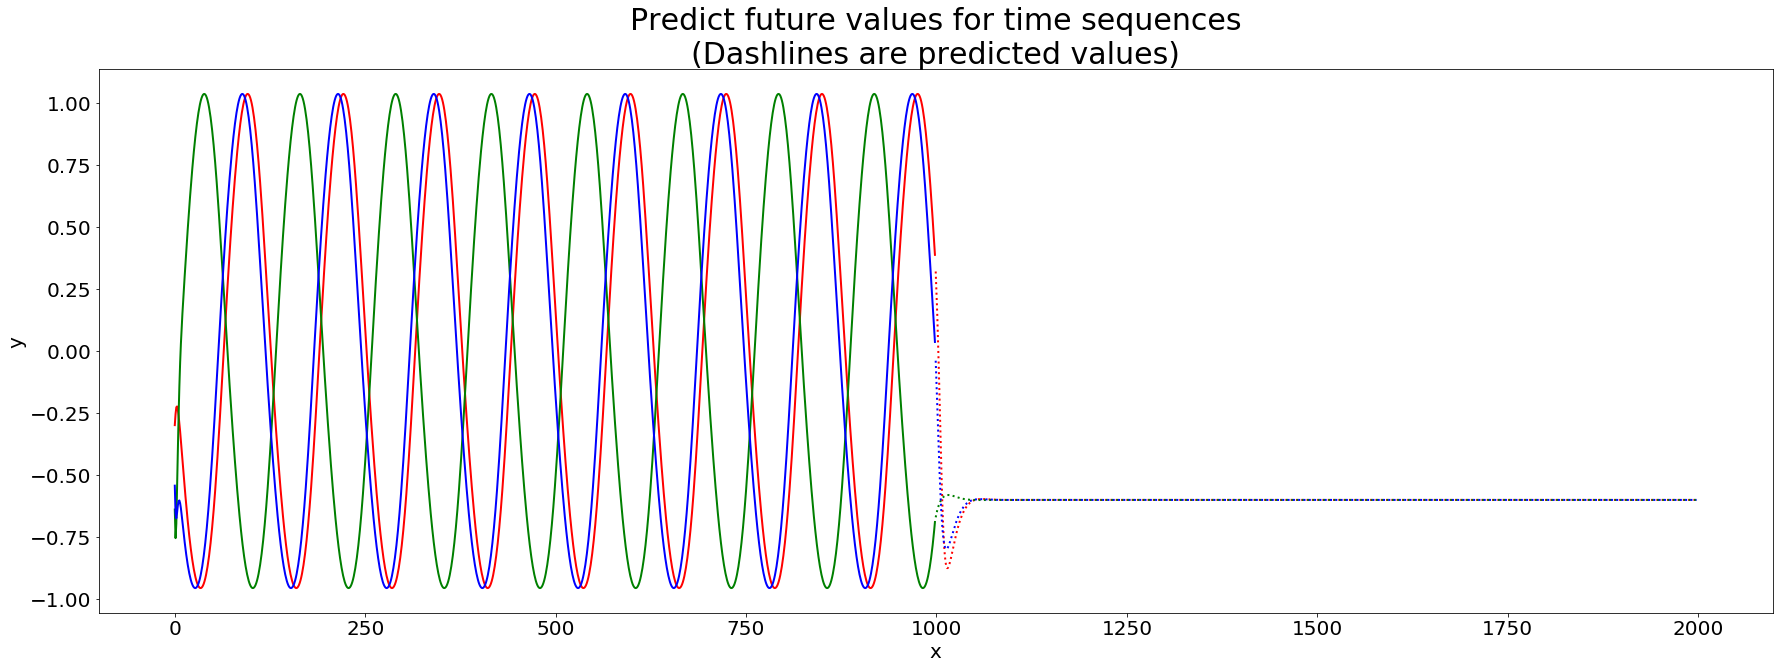

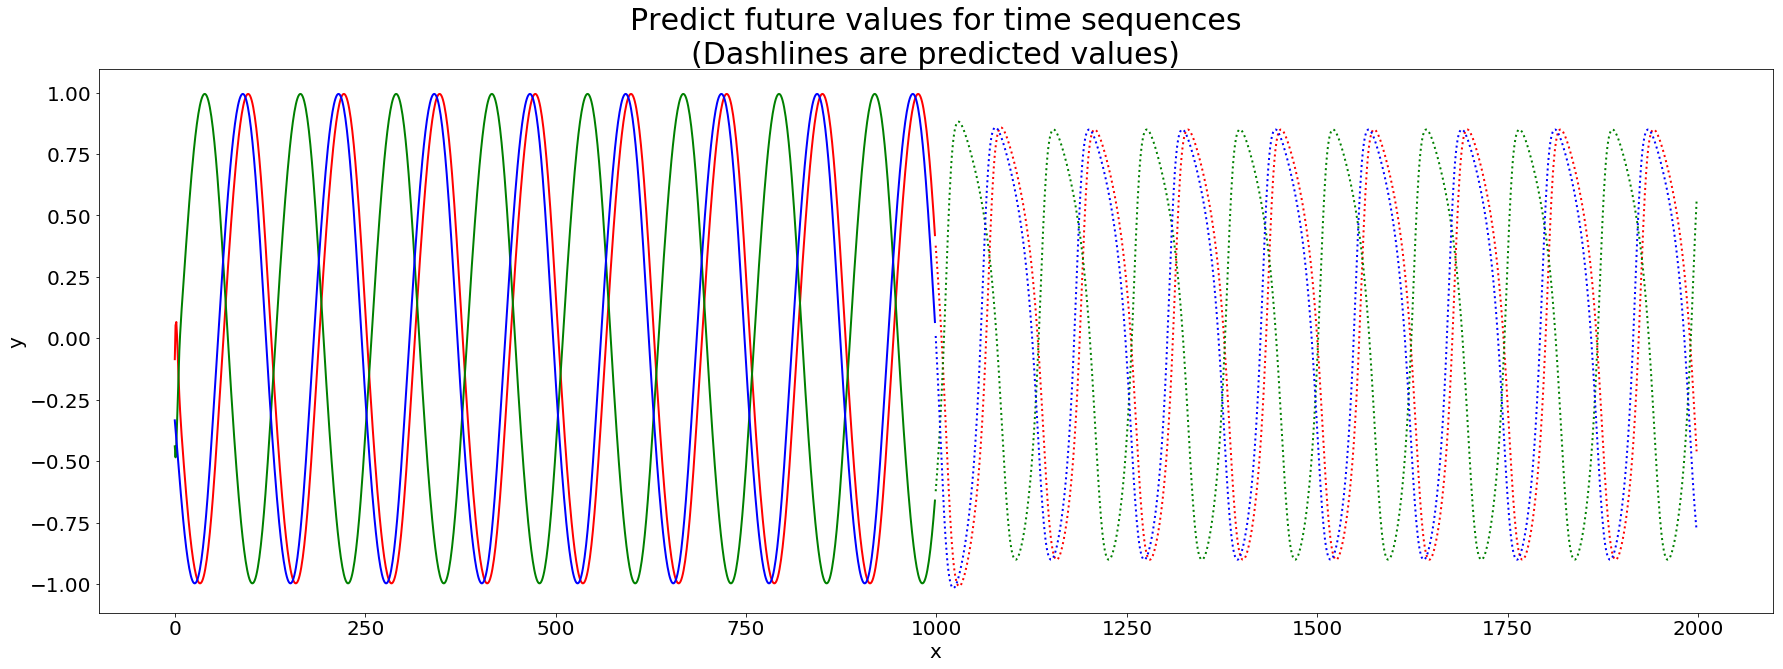

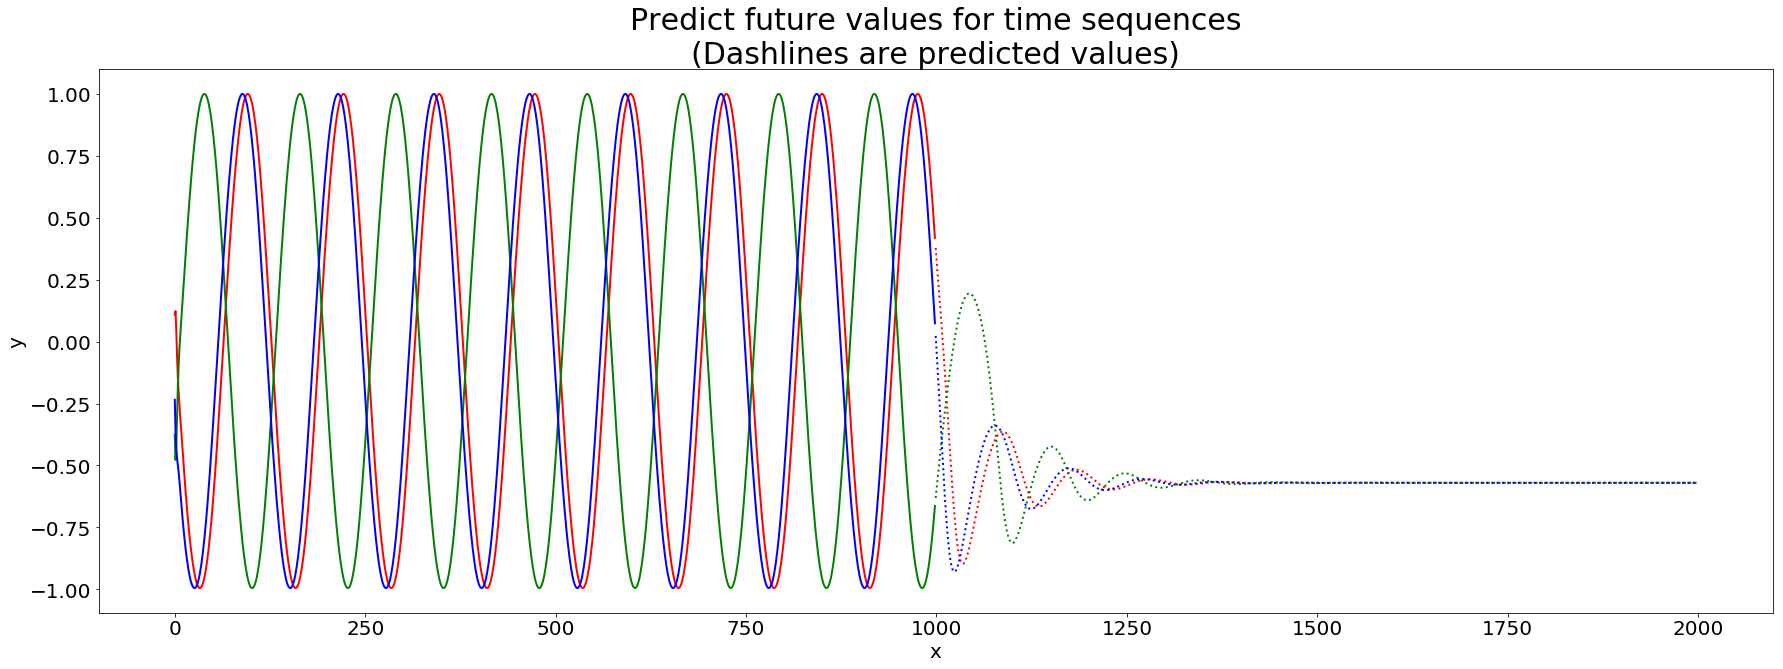

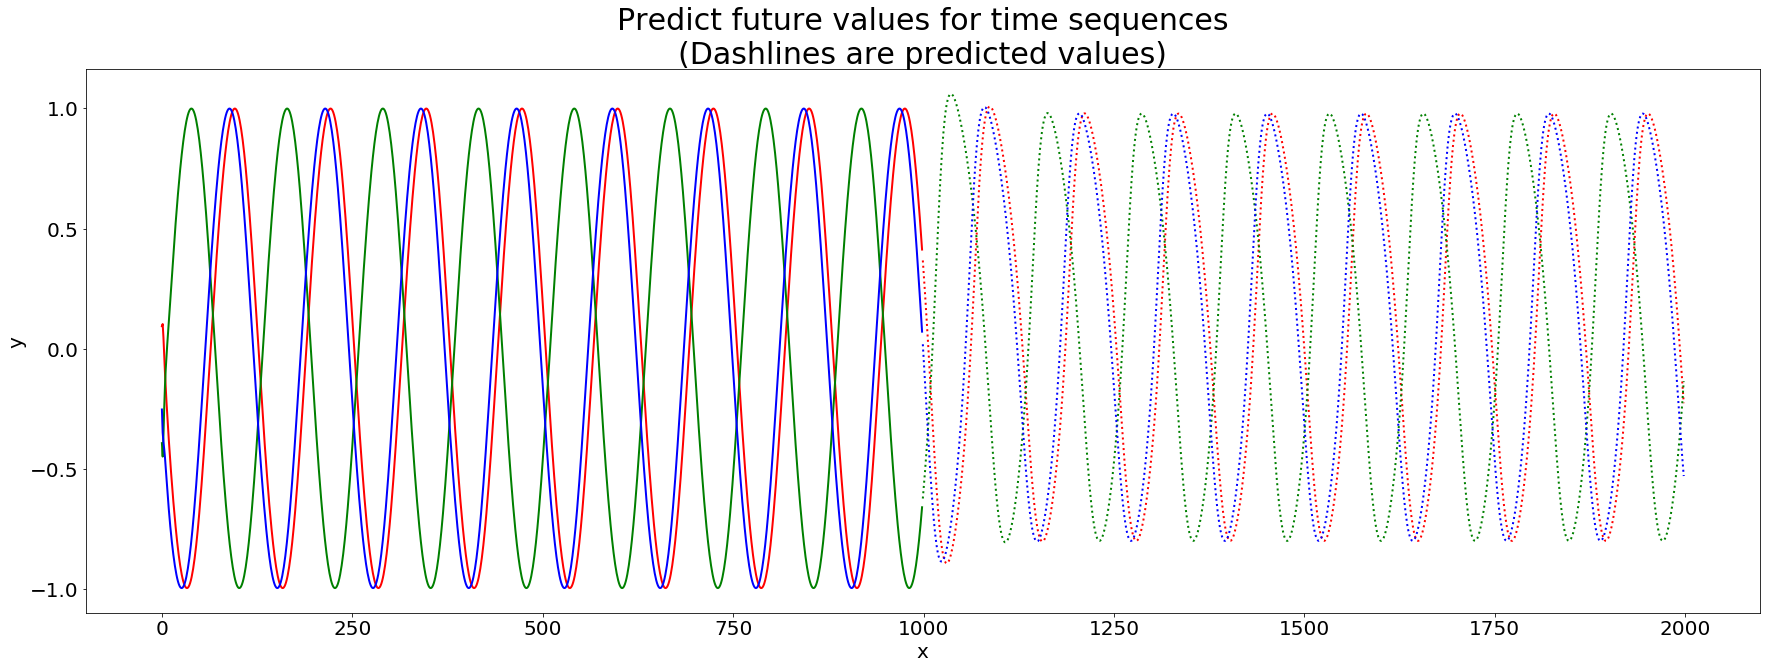

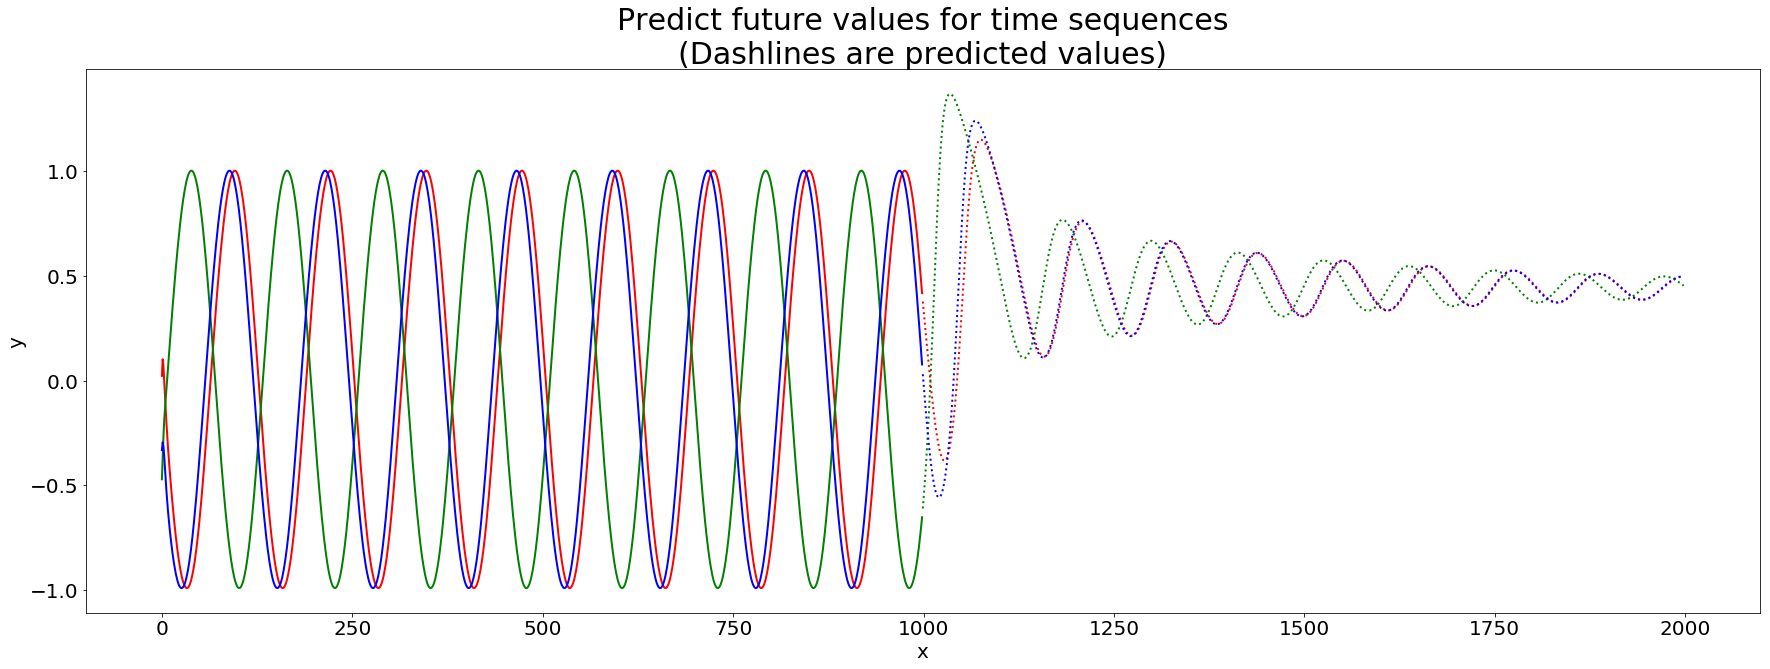

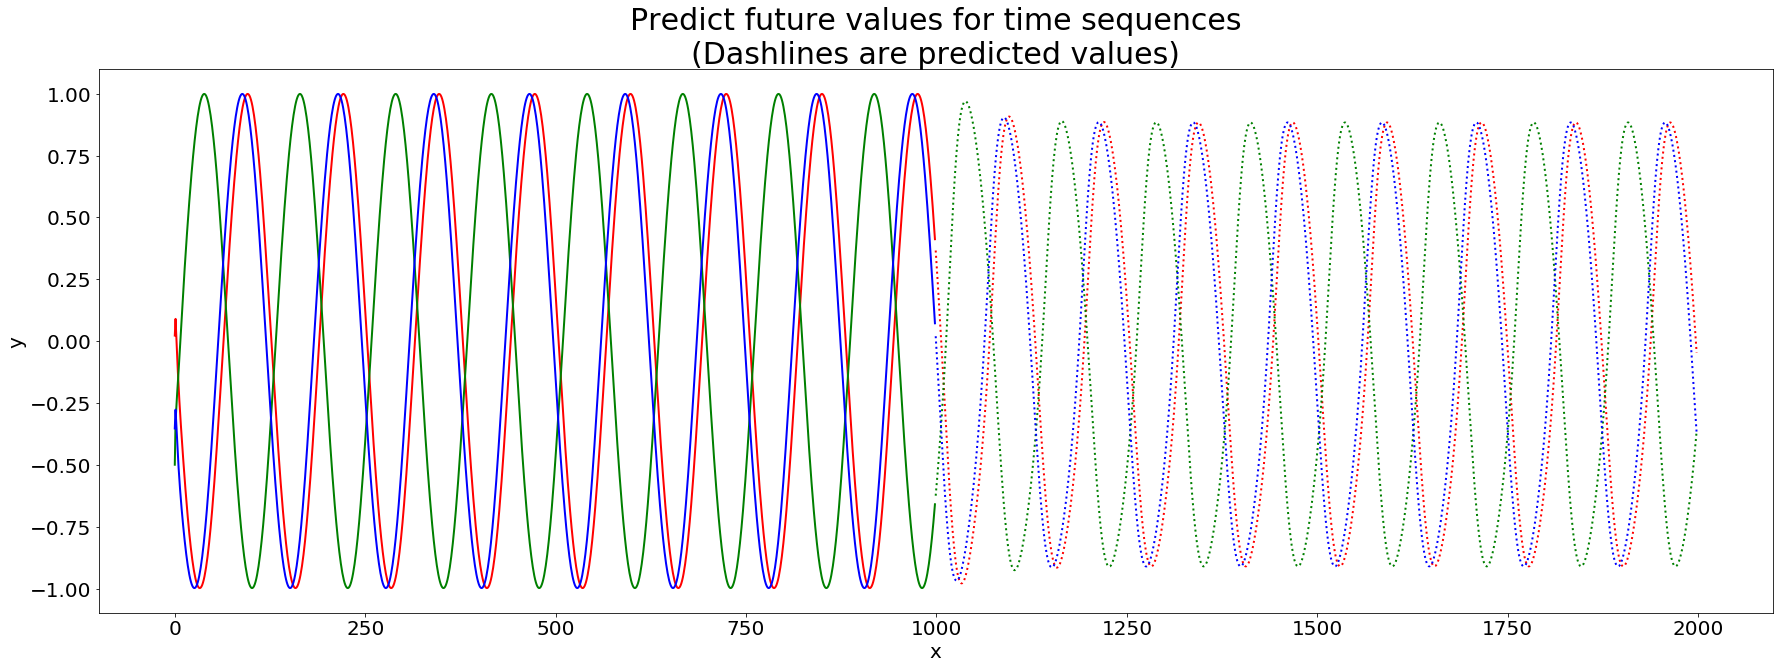

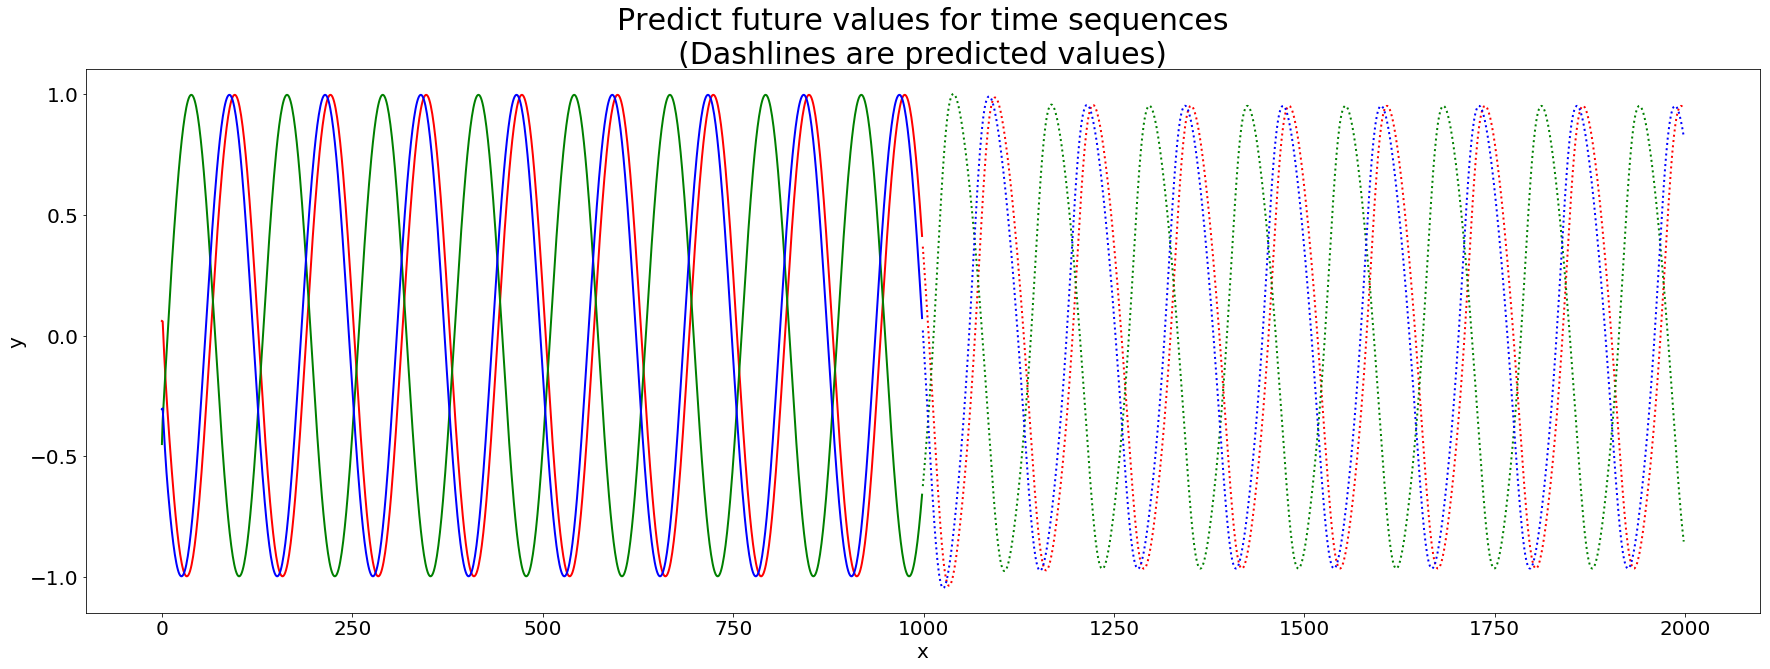

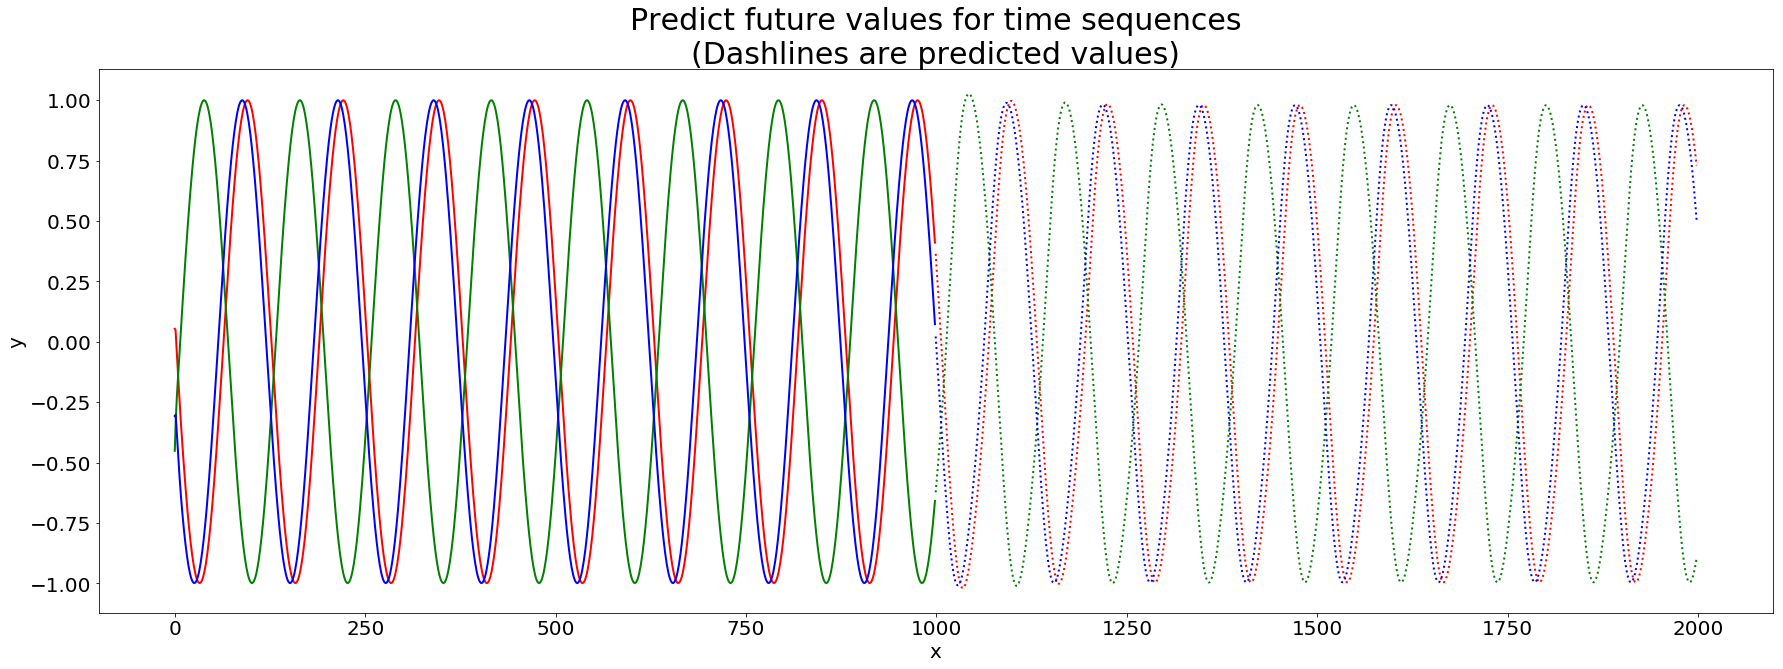

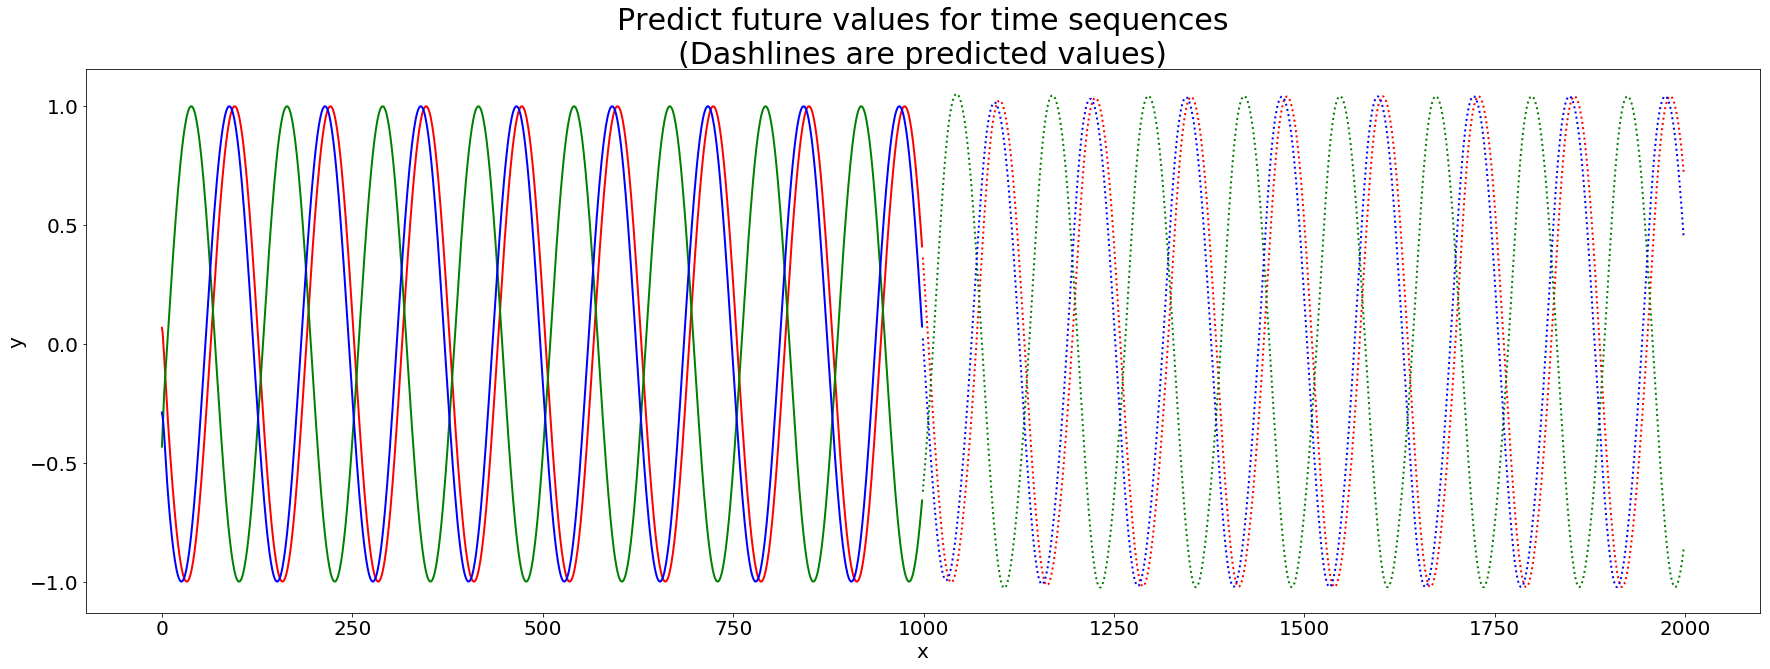

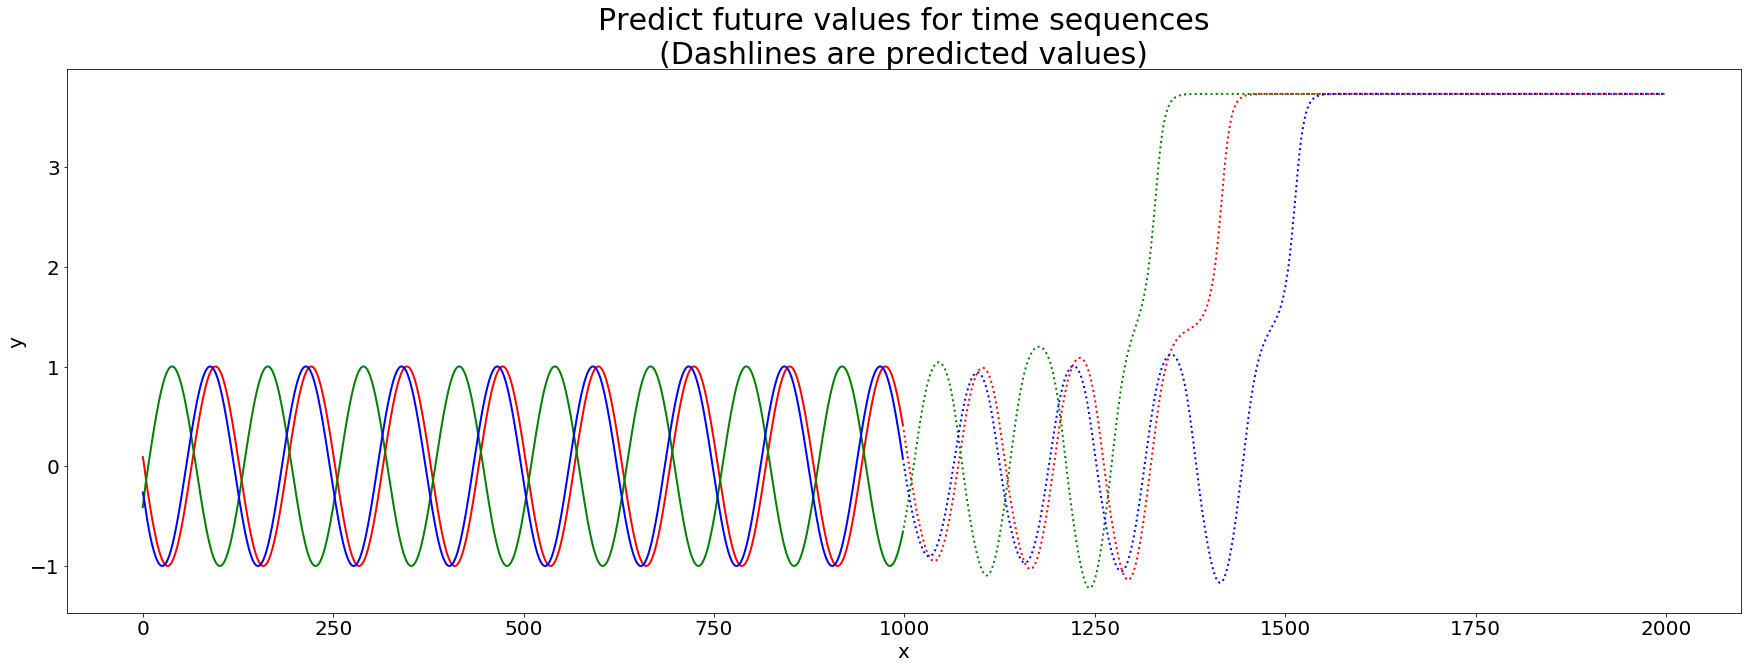

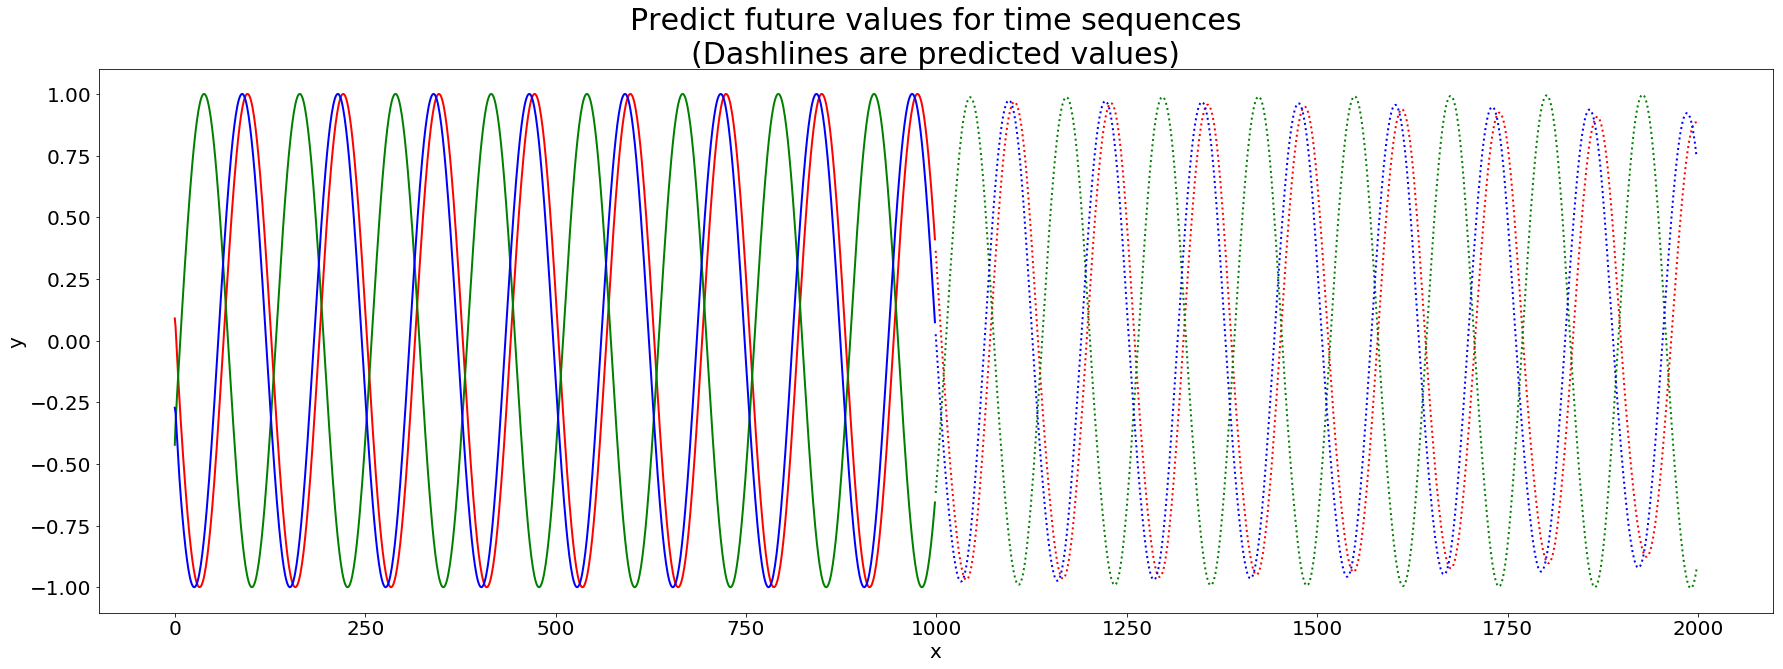

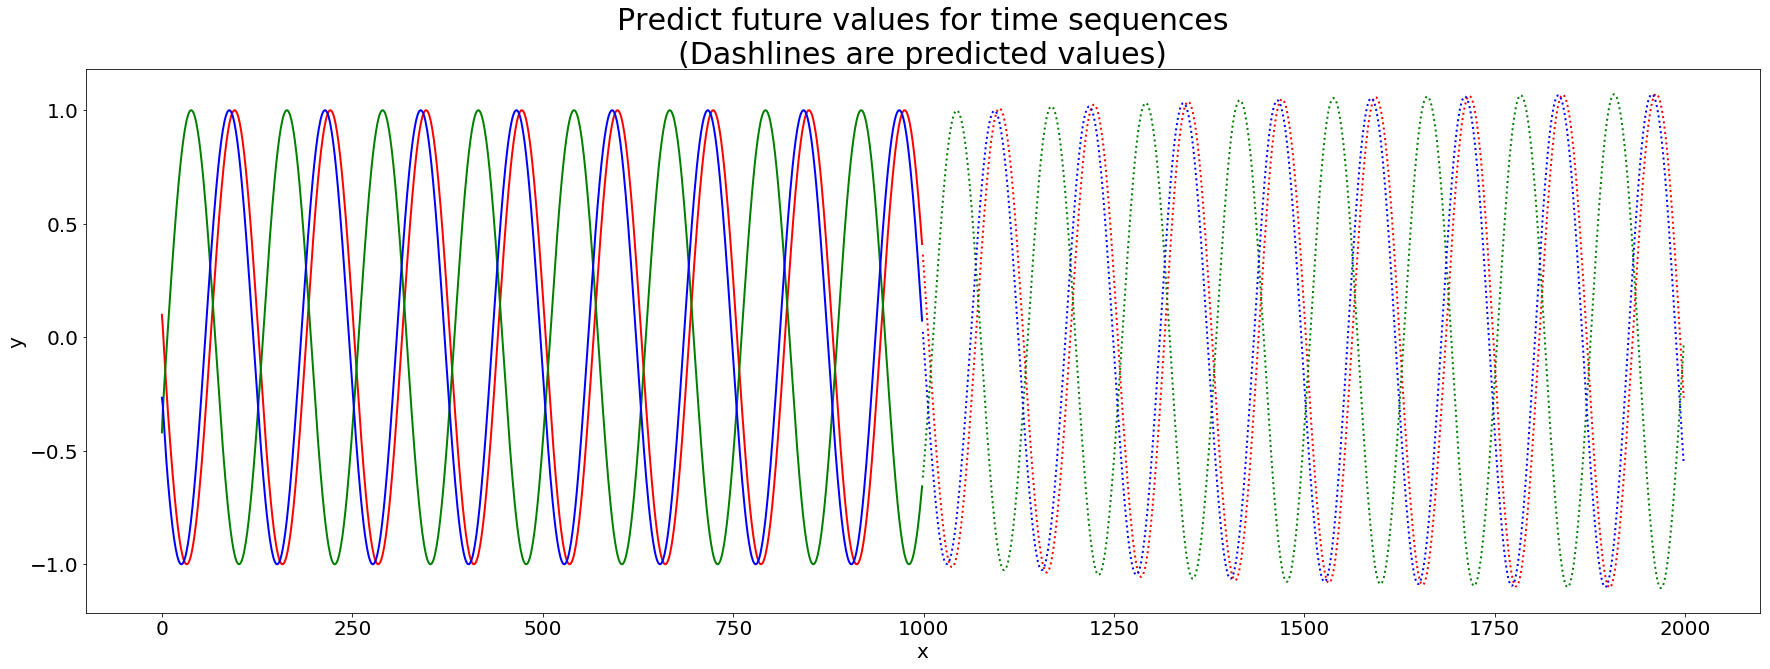

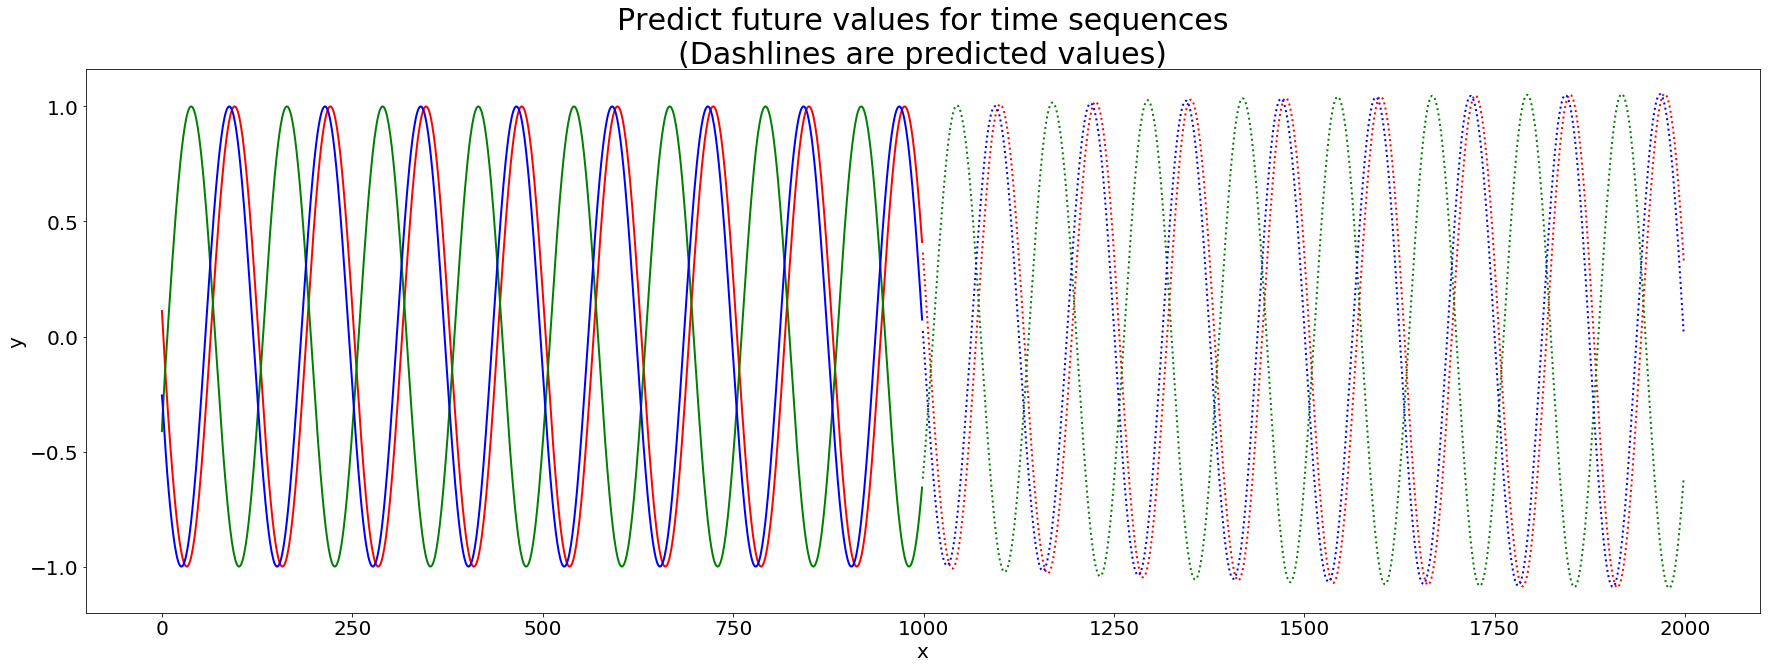

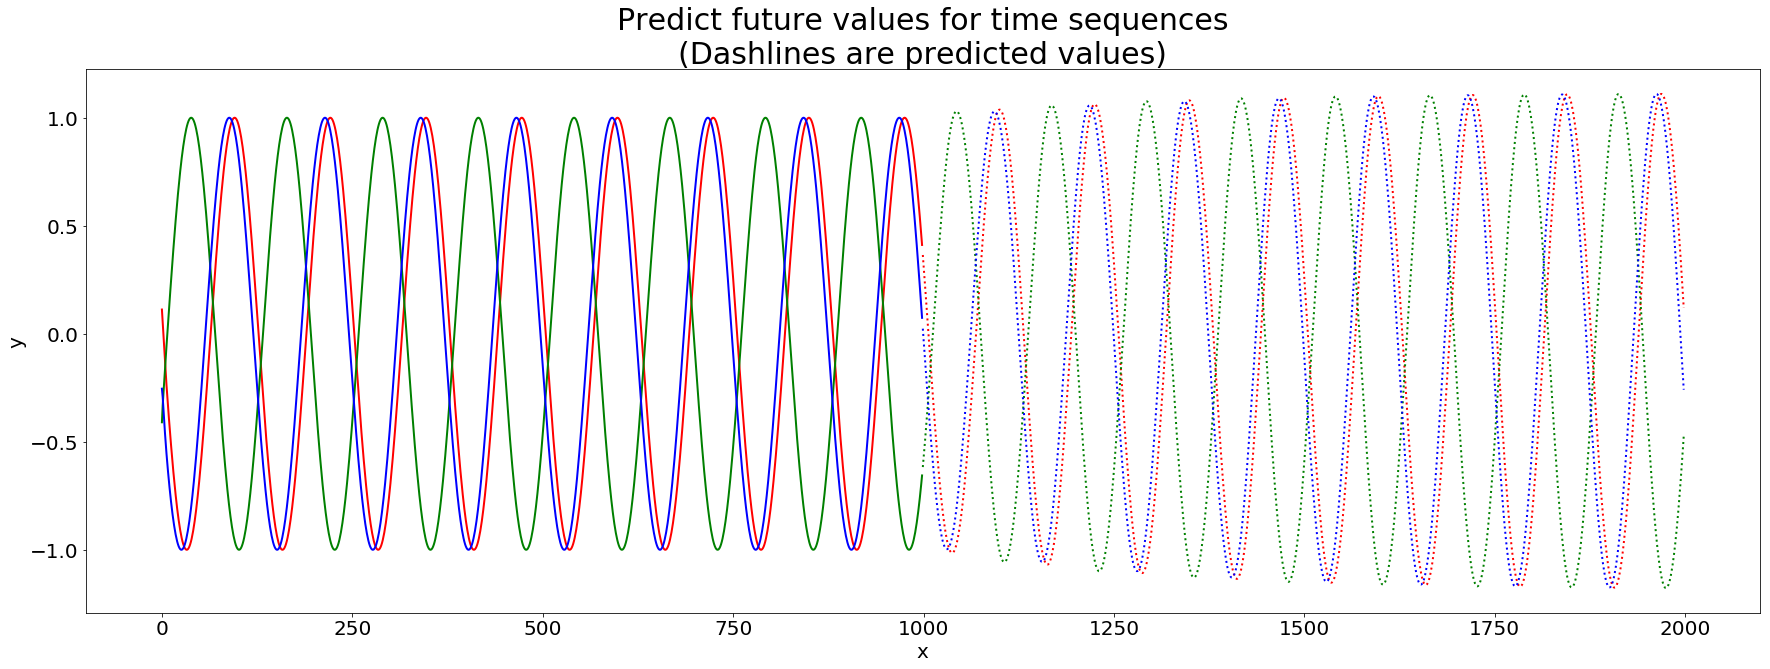

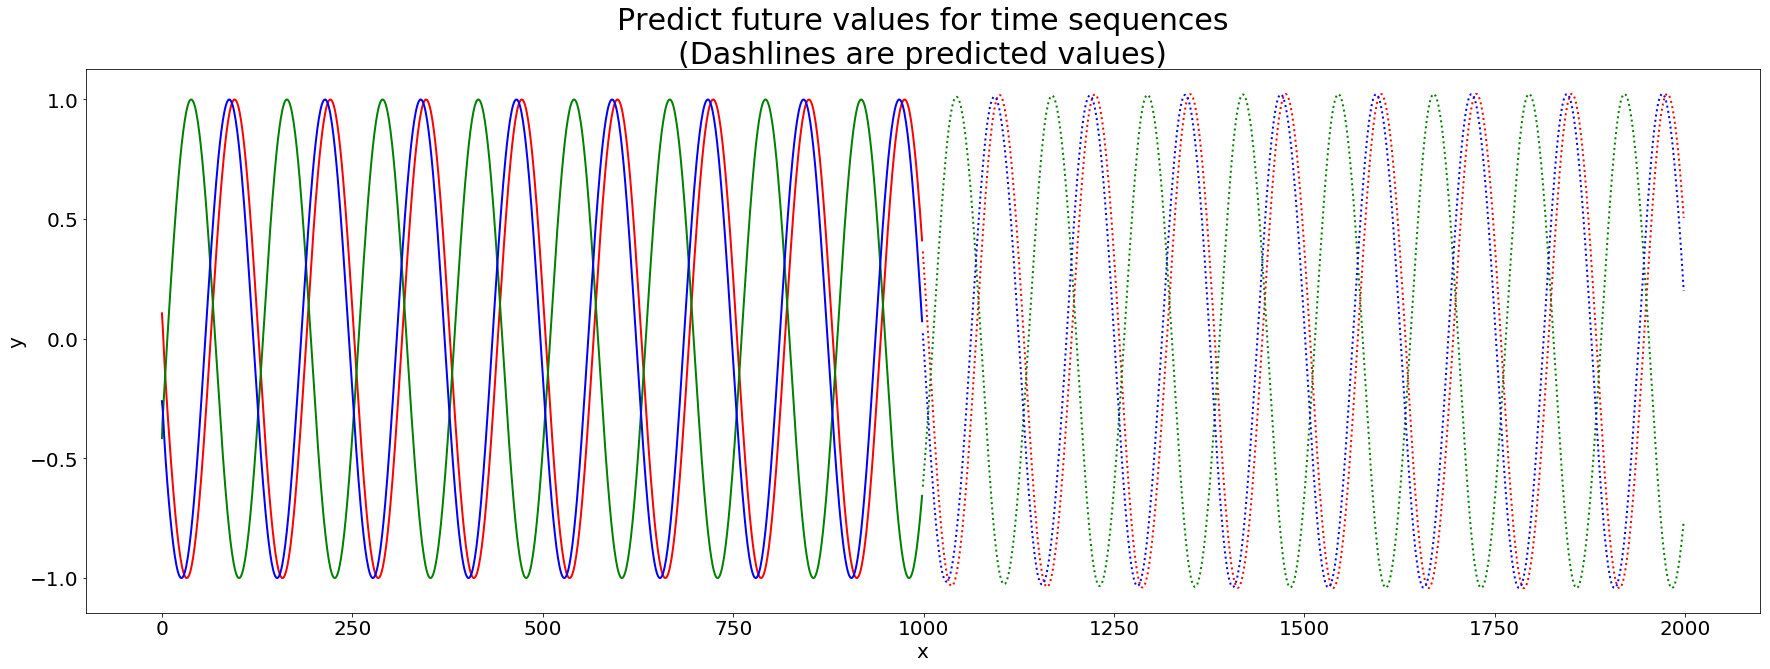

In [53]:
#begin to train
for i in range(15):
    print('STEP: ', i)
    def closure():
        optimizer.zero_grad()
        out = seq(input)
        loss = criterion(out, target)
        print('loss:', loss.item())
        loss.backward()
        return loss
    optimizer.step(closure)
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        future = 1000
        pred = seq(test_input, future=future)
        loss = criterion(pred[:, :-future], test_target)
        print('test loss:', loss.item())
        y = pred.detach().numpy()
    # draw the result
    plt.figure(figsize=(30,10))
    plt.title('Predict future values for time sequences\n(Dashlines are predicted values)', fontsize=30)
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    def draw(yi, color):
        plt.plot(np.arange(input.size(1)), yi[:input.size(1)], color, linewidth = 2.0)
        plt.plot(np.arange(input.size(1), input.size(1) + future), yi[input.size(1):], color + ':', linewidth = 2.0)
    draw(y[0], 'r')
    draw(y[1], 'g')
    draw(y[2], 'b')

We can see that the final iteration produced a result with a test loss of 6*10^-6 and a qualitatively accurate visual continuation of our sine wave. 

